In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
clean_df = pd.read_csv("cleaned_new_train_data.csv")
clean_df.head()

,y,x5,x9,x10,x11,x12,x13,x14,x15,x16,...,x29,x31,x4,x3_Male,x25_LC,x26_PT,x5_qbin,x23_qbin,x29_qbin,x31_qbin
0,1,50,5,5,5,4,3,5.0,3,3,...,192,2.380952,4,False,False,False,3,4,1,4
1,1,44,1,1,1,1,3,3.0,1,4,...,1034,2.250000,4,False,True,False,3,1,3,1
2,0,72,3,1,5,5,3,2.0,2,3,...,1452,2.250000,4,False,True,False,4,1,3,1
3,0,38,1,3,1,3,5,1.0,5,5,...,916,2.250000,4,False,True,True,2,1,3,1
4,1,37,5,5,5,5,2,5.0,5,4,...,390,2.250000,4,True,True,False,2,1,1,1


In [57]:
model_cols = [col for col in clean_df.columns 
              if col not in ['y'] 
              and '_qbin' not in col 
              and '_decile' not in col]

In [58]:
X = clean_df[model_cols]
y = clean_df['y']

In [59]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.40,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,  
    random_state=42,
    stratify=y_temp
)

In [60]:
continuous_cols = [
    col for col in model_cols
    if clean_df[col].dtype in ['float64', 'int64']
    and clean_df[col].nunique() > 10
]
continuous_cols

['x5', 'x23', 'x29', 'x31']

In [61]:
other_cols = [col for col in model_cols if col not in continuous_cols]
other_cols

['x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x28',
 'x4',
 'x3_Male',
 'x25_LC',
 'x26_PT']

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), continuous_cols),
        ("keep", "passthrough", other_cols)
    ]
)

In [63]:
X_train_s = preprocessor.fit_transform(X_train)
X_val_s   = preprocessor.transform(X_val)
X_test_s  = preprocessor.transform(X_test)

In [64]:
final_cols = continuous_cols + other_cols

In [65]:
X_train_s = pd.DataFrame(X_train_s, columns=final_cols)
X_train_s


,x5,x23,x29,x31,x9,x10,x11,x12,x13,x14,...,x18,x19,x20,x21,x22,x28,x4,x3_Male,x25_LC,x26_PT
0,-0.822207,-0.38661,-0.769362,-0.243561,1,1,1,3,3,1.0,...,3,5,3,5,3,1,4,False,False,False
1,0.238767,-0.256563,2.387164,0.594769,2,2,2,2,3,4.0,...,4,4,5,4,4,1,4,True,True,False
2,-0.092788,0.055552,-0.978463,-0.245502,3,3,3,3,5,3.0,...,4,5,4,4,5,1,4,True,False,False
3,-0.689586,-0.152524,-0.629294,-0.115207,3,4,2,4,5,2.0,...,2,4,4,4,5,3,4,False,True,True
4,1.763917,-0.38661,-1.01448,-0.243561,3,2,3,2,4,2.0,...,3,5,3,5,1,3,4,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62337,0.835565,-0.38661,-0.354161,-0.243561,2,2,4,4,3,3.0,...,2,2,1,2,3,2,4,False,True,False
62338,0.172456,-0.256563,-0.20809,0.568365,1,1,1,1,2,5.0,...,5,5,5,5,3,1,4,False,True,False
62339,-0.556964,-0.256563,1.312645,0.27792,1,4,4,4,1,1.0,...,3,4,4,4,1,1,4,False,True,False
62340,0.172456,-0.022477,-0.356162,-0.144545,3,3,3,3,3,4.0,...,5,5,5,5,5,1,4,False,True,False


In [66]:
X_val_s   = pd.DataFrame(X_val_s,   columns=final_cols)
X_val_s

,x5,x23,x29,x31,x9,x10,x11,x12,x13,x14,...,x18,x19,x20,x21,x22,x28,x4,x3_Male,x25_LC,x26_PT
0,-0.159098,-0.126515,-0.292131,-0.052131,2,3,2,3,3,2.0,...,2,2,4,3,3,3,4,False,True,True
1,-0.689586,-0.38661,-0.254113,-0.243561,2,2,2,3,3,2.0,...,2,4,1,3,3,2,4,False,False,False
2,-0.888518,0.081562,-0.606283,-0.34991,1,5,5,5,1,1.0,...,4,3,3,3,1,1,4,False,True,False
3,1.830228,-0.38661,-0.617288,-0.243561,2,5,2,3,4,2.0,...,4,5,4,4,4,3,4,True,True,True
4,0.437699,0.003533,1.420697,-0.135744,5,2,5,5,2,5.0,...,3,3,4,3,2,1,4,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,-1.02114,-0.178534,-0.921435,-0.144545,2,0,2,5,2,2.0,...,2,4,3,5,2,3,4,True,False,False
20777,2.029161,-0.38661,-0.739347,-0.243561,1,5,2,2,5,2.0,...,2,1,1,4,5,3,4,True,True,True
20778,0.968187,2.240354,-0.511237,-0.470021,2,4,2,3,4,2.0,...,5,4,5,5,4,3,4,True,True,True
20779,-2.082114,-0.38661,-0.634297,-0.243561,2,3,2,5,3,2.0,...,4,3,1,4,3,3,4,False,True,True


In [67]:
X_test_s  = pd.DataFrame(X_test_s,  columns=final_cols)
X_test_s

,x5,x23,x29,x31,x9,x10,x11,x12,x13,x14,...,x18,x19,x20,x21,x22,x28,x4,x3_Male,x25_LC,x26_PT
0,0.769254,-0.38661,2.194071,-0.243561,3,3,2,3,2,5.0,...,4,4,4,4,3,1,4,False,True,False
1,0.039834,-0.074496,0.313162,-0.100539,4,4,4,4,5,4.0,...,4,5,5,5,5,1,4,True,True,False
2,-0.225409,1.434058,-0.071024,-0.47271,2,2,2,4,5,2.0,...,5,3,3,4,5,3,4,False,False,False
3,0.570321,-0.38661,-0.472218,-0.243561,4,4,4,4,3,4.0,...,5,5,4,5,5,1,4,False,True,False
4,-1.352694,-0.256563,-0.525244,-0.038929,2,1,2,3,4,2.0,...,3,3,4,3,4,3,4,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,0.238767,-0.38661,-0.606283,-0.243561,4,2,1,2,4,4.0,...,3,3,1,4,4,3,4,True,True,False
20777,0.172456,-0.38661,0.444225,-0.243561,3,5,4,1,2,4.0,...,2,3,5,4,2,3,4,True,True,True
20778,0.835565,-0.38661,-0.90943,-0.243561,4,5,4,5,2,4.0,...,4,4,1,4,4,3,4,False,True,False
20779,-0.888518,-0.38661,1.36567,-0.243561,3,2,3,3,3,4.0,...,2,4,4,4,4,2,4,True,True,True


##### logistic Regression model

In [68]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lr_l1.fit(X_train_s, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


##### For Validation test

Validation Accuracy : 0.879
Validation Precision: 0.870
Validation Recall   : 0.847
Validation F1       : 0.858


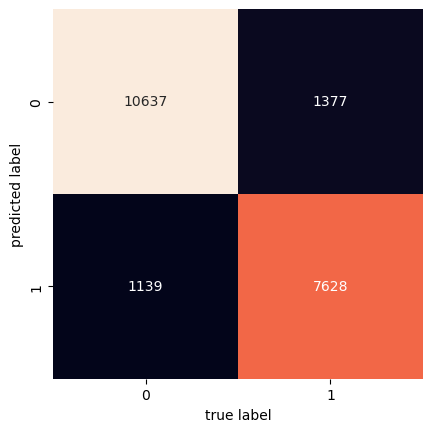

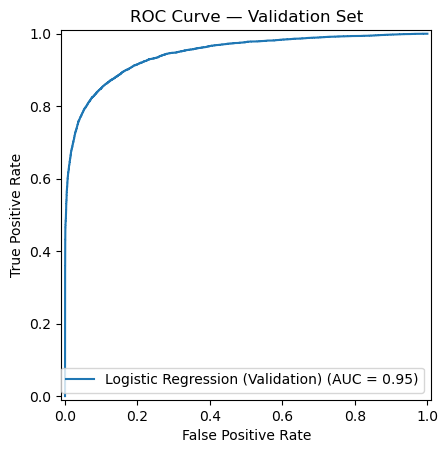

In [71]:
# Accuracy and Confusion Matrix for test data
y_val_pred = lr_l1.predict(X_val_s)
print("Validation Accuracy : %.3f" % metrics.accuracy_score(y_val, y_val_pred))
print("Validation Precision: %.3f" % metrics.precision_score(y_val, y_val_pred))
print("Validation Recall   : %.3f" % metrics.recall_score(y_val, y_val_pred))
print("Validation F1       : %.3f" % metrics.f1_score(y_val, y_val_pred))

cm = metrics.confusion_matrix(y_val, lr_l1.predict(X_val_s))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

val_pred_proba = lr_l1.predict_proba(X_val_s)[:,1]
# print("Baseline AUC:", roc_auc_score(y_val, val_pred_proba))
fpr, tpr, thresholds = roc_curve(y_val, val_pred_proba)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          name='Logistic Regression (Validation)')
display.plot()

plt.title("ROC Curve — Validation Set")
plt.show()


##### For Test set

Test Accuracy : 0.872
Test Precision: 0.866
Test Recall   : 0.834
Test F1       : 0.850


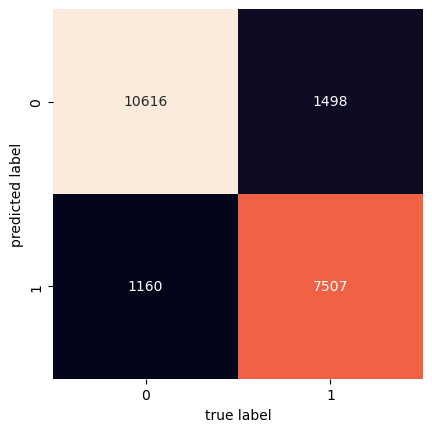

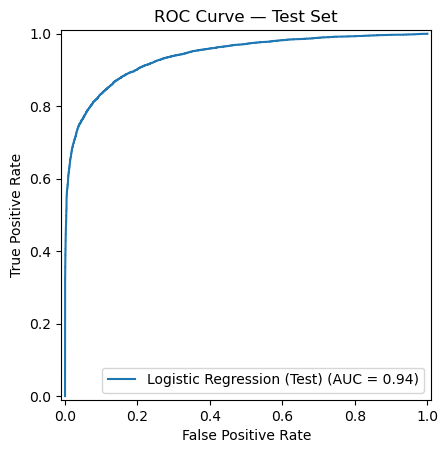

In [72]:
# TEST predictions
y_test_pred = lr_l1.predict(X_test_s)

print("Test Accuracy : %.3f" % metrics.accuracy_score(y_test, y_test_pred))
print("Test Precision: %.3f" % metrics.precision_score(y_test, y_test_pred))
print("Test Recall   : %.3f" % metrics.recall_score(y_test, y_test_pred))
print("Test F1       : %.3f" % metrics.f1_score(y_test, y_test_pred))

cm = metrics.confusion_matrix(y_test, lr_l1.predict(X_test_s))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


# Test ROC Curve
test_pred_proba = lr_l1.predict_proba(X_test_s)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_test, test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test,
                          name='Logistic Regression (Test)')
display.plot()

plt.title("ROC Curve — Test Set")
plt.show()

#### Hyperparameter tuning with RandomizedSearchCV

In [73]:
param_dist = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 20),
    "solver": ["liblinear"],
}

lr_cv = RandomizedSearchCV(
    LogisticRegression(max_iter=2000),
    param_distributions=param_dist,
    n_iter=20,            # 20 random combinations
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=-1
)


In [74]:
lr_cv.fit(X_train_s, y_train)
best_lr = lr_cv.best_estimator_
print("Best C:", lr_cv.best_params_)

Best C: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.07847599703514611)}


Accuracy : 0.878
Precision: 0.869
Recall   : 0.847
F1 Score : 0.858


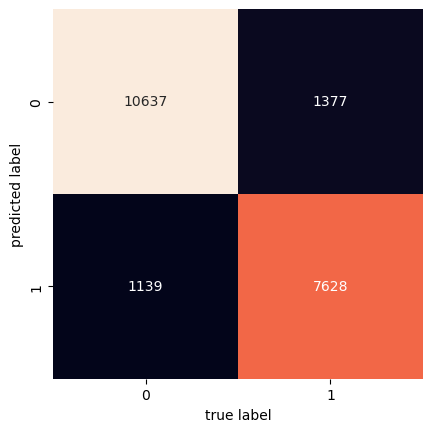

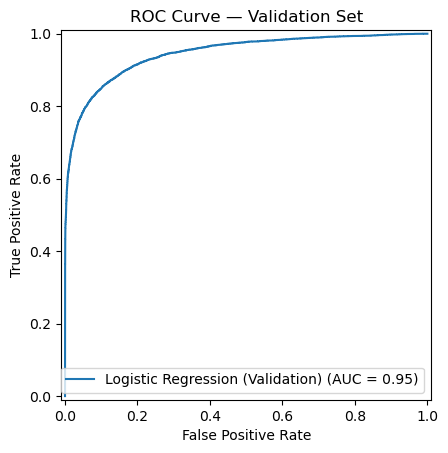

In [77]:
y_val_pred = best_lr.predict(X_val_s)
accuracy = metrics.accuracy_score(y_val, y_val_pred)
precision = metrics.precision_score(y_val, y_val_pred)
recall = metrics.recall_score(y_val, y_val_pred)
f1 = metrics.f1_score(y_val, y_val_pred)

print("Accuracy : %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall   : %.3f" % recall)
print("F1 Score : %.3f" % f1)

cm = metrics.confusion_matrix(y_val, lr_l1.predict(X_val_s))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

val_pred_proba = best_lr.predict_proba(X_val_s)[:,1]
# print("Baseline AUC:", roc_auc_score(y_val, val_pred_proba))
fpr, tpr, thresholds = roc_curve(y_val, val_pred_proba)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          name='Logistic Regression (Validation)')
display.plot()

plt.title("ROC Curve — Validation Set")
plt.show()

Accuracy : 0.872
Precision: 0.866
Recall   : 0.833
F1 Score : 0.849


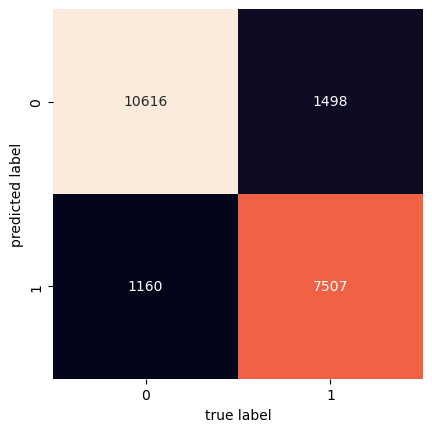

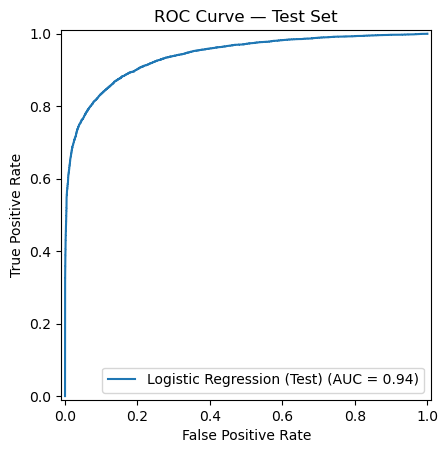

In [78]:
y_test_pred = best_lr.predict(X_test_s)
# Metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)

print("Accuracy : %.3f" % accuracy)
print("Precision: %.3f" % precision)
print("Recall   : %.3f" % recall)
print("F1 Score : %.3f" % f1)

cm = metrics.confusion_matrix(y_test, lr_l1.predict(X_test_s))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Test ROC Curve
test_pred_proba = best_lr.predict_proba(X_test_s)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_test, test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test,
                          name='Logistic Regression (Test)')
display.plot()

plt.title("ROC Curve — Test Set")
plt.show()

##### Already removed highly interactive features while cleaning and pre processing the df

##### Adding interactive column features to check if AUC can be improved

In [80]:
coef_df = pd.DataFrame({
    "feature": X_train_s.columns,
    "coef": best_lr.coef_[0]
}).sort_values("coef", ascending=False)
coef_df

,feature,coef
21,x25_LC,2.072659
9,x14,1.103730
12,x17,0.305490
15,x20,0.300407
13,x18,0.293371
4,x9,0.289527
17,x22,0.165312
11,x16,0.150400
14,x19,0.139113
16,x21,0.118573


In [81]:
clean_df['x23_x29'] = clean_df['x23'] * clean_df['x29']
clean_df['x23_x31'] = clean_df['x23'] * clean_df['x31']
clean_df['x29_x31'] = clean_df['x29'] * clean_df['x31']
clean_df['x5_x23'] = clean_df['x5'] * clean_df['x23']
clean_df['x5_x29'] = clean_df['x5'] * clean_df['x29']

clean_df['x23_log'] = np.log1p(clean_df['x23'])
clean_df['x29_log'] = np.log1p(clean_df['x29'])
clean_df['x31_log'] = np.log1p(clean_df['x31'])
clean_df['x5_log']  = np.log1p(clean_df['x5'])

In [82]:
clean_df

,y,x5,x9,x10,x11,x12,x13,x14,x15,x16,...,x31_qbin,x23_x29,x23_x31,x29_x31,x5_x23,x5_x29,x23_log,x29_log,x31_log,x5_log
0,1,50,5,5,5,4,3,5.0,3,3,...,4,4032,50.0,457.142857,1050,9600,3.091042,5.262690,1.218157,3.931826
1,1,44,1,1,1,1,3,3.0,1,4,...,1,0,0.0,2326.500000,0,45496,0.000000,6.942157,1.178655,3.806662
2,0,72,3,1,5,5,3,2.0,2,3,...,1,0,0.0,3267.000000,0,104544,0.000000,7.281386,1.178655,4.290459
3,0,38,1,3,1,3,5,1.0,5,5,...,1,0,0.0,2061.000000,0,34808,0.000000,6.821107,1.178655,3.663562
4,1,37,5,5,5,5,2,5.0,5,4,...,1,0,0.0,877.500000,0,14430,0.000000,5.968708,1.178655,3.637586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,27,5,5,5,5,5,5.0,5,5,...,1,95970,27.0,528.814286,1890,37017,4.262680,7.224025,0.326216,3.332205
103900,0,62,1,4,4,4,4,2.0,4,1,...,4,10218,62.0,17597.666667,372,105586,1.945910,7.440734,2.427748,4.143135
103901,0,45,3,4,3,5,1,3.0,1,1,...,4,8992,45.0,1580.625000,720,25290,2.833213,6.333280,1.338285,3.828641
103902,0,57,2,4,2,2,4,2.0,4,4,...,4,0,0.0,708.750000,0,17955,0.000000,5.755742,1.178655,4.060443


In [83]:
model_cols_new = [
    col for col in clean_df.columns
    if col not in ['y']
    and '_qbin' not in col
    and '_decile' not in col
]
model_cols_new

['x5',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x28',
 'x29',
 'x31',
 'x4',
 'x3_Male',
 'x25_LC',
 'x26_PT',
 'x23_x29',
 'x23_x31',
 'x29_x31',
 'x5_x23',
 'x5_x29',
 'x23_log',
 'x29_log',
 'x31_log',
 'x5_log']

In [84]:
continuous_cols_new = [
    col for col in model_cols_new
    if clean_df[col].dtype in ['float64', 'int64']
    and clean_df[col].nunique() > 10
]

In [85]:
other_cols_new = [col for col in model_cols if col not in continuous_cols]

In [86]:
X_f = clean_df[model_cols_new]
y_f = clean_df['y']

from sklearn.model_selection import train_test_split

X_train_f, X_temp_f, y_train_f, y_temp_f = train_test_split(
    X_f, y_f, test_size=0.4, stratify=y_f, random_state=42
)

X_val_f, X_test_f, y_val_f, y_test_f = train_test_split(
    X_temp_f, y_temp_f, test_size=0.5, stratify=y_temp_f, random_state=42
)


In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), continuous_cols_new),
        ('keep', 'passthrough', other_cols_new)
    ]
)

X_train_s_f = preprocessor.fit_transform(X_train_f)
X_val_s_f   = preprocessor.transform(X_val_f)
X_test_s_f  = preprocessor.transform(X_test_f)

# Rebuild DataFrames with correct column order
final_cols_new = continuous_cols_new + other_cols_new

X_train_s_f = pd.DataFrame(X_train_s_f, columns=final_cols_new)
X_val_s_f   = pd.DataFrame(X_val_s_f, columns=final_cols_new)
X_test_s_f  = pd.DataFrame(X_test_s_f, columns=final_cols_new)


In [88]:
param_dist = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 20),
    "solver": ["liblinear"]
}

lr_cv = RandomizedSearchCV(
    LogisticRegression(max_iter=3000),
    param_distributions=param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=-1
)

lr_cv.fit(X_train_s_f, y_train_f)

best_lr = lr_cv.best_estimator_

Val Accuracy : 0.880
Val Precision: 0.873
Val Recall   : 0.848
Val F1       : 0.860


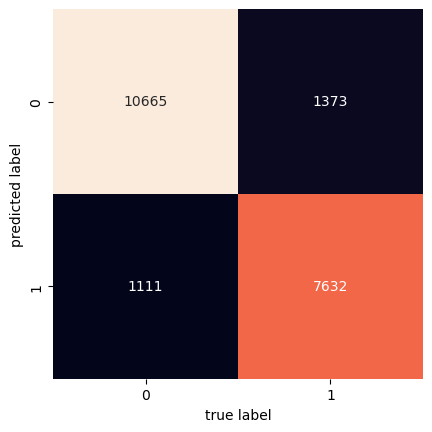

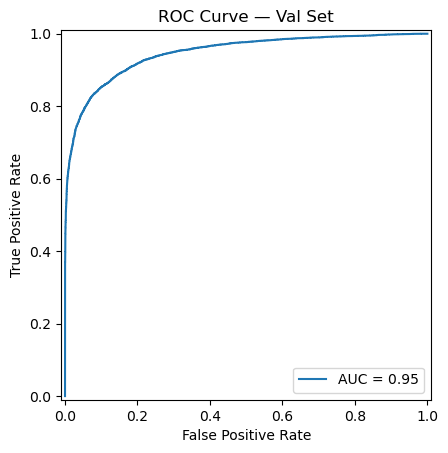

In [93]:
y_val_pred = best_lr.predict(X_val_s_f)

print("Val Accuracy : %.3f" % metrics.accuracy_score(y_val_f, y_val_pred))
print("Val Precision: %.3f" % metrics.precision_score(y_val_f, y_val_pred))
print("Val Recall   : %.3f" % metrics.recall_score(y_val_f, y_val_pred))
print("Val F1       : %.3f" % metrics.f1_score(y_val_f, y_val_pred))

cm = metrics.confusion_matrix(y_val_f, best_lr.predict(X_val_s_f))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Val ROC Curve
val_pred_proba = best_lr.predict_proba(X_val_s_f)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_val_f, val_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test)
display.plot()

plt.title("ROC Curve — Val Set")
plt.show()


Test Accuracy : 0.873
Test Precision: 0.867
Test Recall   : 0.834
Test F1       : 0.850


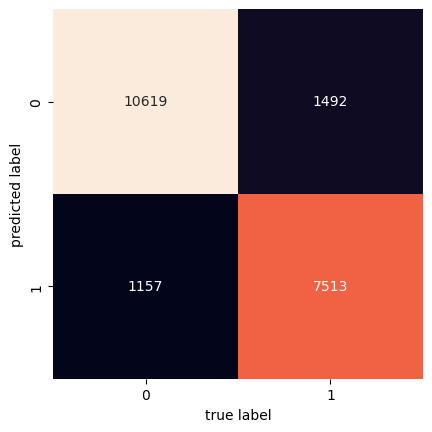

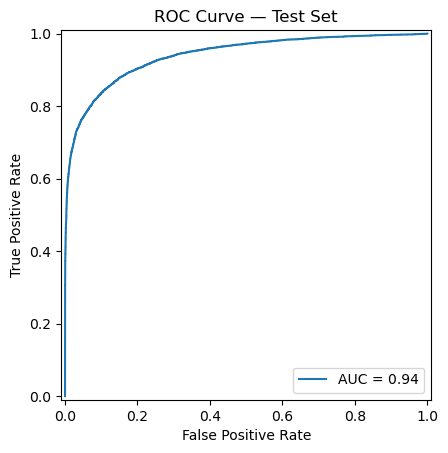

In [94]:
test_pred = best_lr.predict(X_test_s_f)
test_proba = best_lr.predict_proba(X_test_s_f)[:,1]

print("Test Accuracy : %.3f" % metrics.accuracy_score(y_test_f, test_pred))
print("Test Precision: %.3f" % metrics.precision_score(y_test_f, test_pred))
print("Test Recall   : %.3f" % metrics.recall_score(y_test_f, test_pred))
print("Test F1       : %.3f" % metrics.f1_score(y_test_f, test_pred))

cm = metrics.confusion_matrix(y_test_f, best_lr.predict(X_test_s_f))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Test ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test_f, test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test)
display.plot()

plt.title("ROC Curve — Test Set")
plt.show()
